# Criminal San Francisco

In [55]:
import pandas as pd
import numpy as np

In [56]:
df=pd.read_csv('criminal_san_francisco.csv')
df

,Unnamed: 0,Unnamed: 0.1,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,0,0,2010-10-18 13:37:00,ASSAULT,BATTERY,Monday,SOUTHERN,NONE,-122.407376,37.779989
1,1,1,2013-01-11 03:21:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Friday,TENDERLOIN,NONE,-122.412437,37.783486
2,2,2,2004-03-31 15:00:00,ASSAULT,BATTERY,Wednesday,INGLESIDE,JUVENILE ADMONISHED,-122.451164,37.745564
3,3,3,2005-02-27 22:33:00,ASSAULT,THREATS AGAINST LIFE,Sunday,INGLESIDE,NONE,-122.428614,37.722765
4,4,4,2013-06-30 17:39:00,ASSAULT,BATTERY,Sunday,MISSION,NONE,-122.418449,37.753027
...,...,...,...,...,...,...,...,...,...,...
89995,89995,89995,2005-05-21 17:55:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Saturday,TARAVAL,"ARREST, BOOKED",-122.451157,37.716582
89996,89996,89996,2006-06-13 14:14:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,CENTRAL,"ARREST, BOOKED",-122.407562,37.798678
89997,89997,89997,2004-12-08 20:20:00,WARRANTS,WARRANT ARREST,Wednesday,INGLESIDE,"ARREST, BOOKED",-122.417108,37.712256
89998,89998,89998,2009-11-11 07:40:00,WARRANTS,WARRANT ARREST,Wednesday,MISSION,"ARREST, BOOKED",-122.420010,37.770110


In [57]:
df.Category.nunique()

9

In [58]:
df.Resolution.nunique()

17

In [59]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Dates', 'Category', 'Descript',
       'DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'],
      dtype='object')

In [60]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Dates'],axis=1,inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    90000 non-null  object 
 1   Descript    90000 non-null  object 
 2   DayOfWeek   90000 non-null  object 
 3   PdDistrict  90000 non-null  object 
 4   Resolution  90000 non-null  object 
 5   X           90000 non-null  float64
 6   Y           90000 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.8+ MB


In [62]:
from sklearn import preprocessing 
encoder= preprocessing.LabelEncoder()
encoder.fit(df.Category)
df.Category=encoder.transform(df.Category)
encoder.fit(df.Descript)
df.Descript=encoder.transform(df.Descript)
encoder.fit(df.DayOfWeek)
df.DayOfWeek=encoder.transform(df.DayOfWeek)
encoder.fit(df.PdDistrict)
df.PdDistrict=encoder.transform(df.PdDistrict)
encoder.fit(df.Resolution)
df.Resolution=encoder.transform(df.Resolution)

In [63]:
df['tan']=pd.DataFrame(np.arctan(np.array(df['X'])/np.array(df['Y'])))

In [64]:
df.drop(columns=['X','Y'],axis=1,inplace=True)

In [65]:
df['Category'] = df.Category.astype('category')
df['Descript'] = df.Descript.astype('category')
df['DayOfWeek'] = df.DayOfWeek.astype('category')
df['PdDistrict'] = df.PdDistrict.astype('category')
df['Resolution'] = df.Resolution.astype('category')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Category    90000 non-null  category
 1   Descript    90000 non-null  category
 2   DayOfWeek   90000 non-null  category
 3   PdDistrict  90000 non-null  category
 4   Resolution  90000 non-null  category
 5   tan         90000 non-null  float64 
dtypes: category(5), float64(1)
memory usage: 1.2 MB


In [67]:

Categorydummies = pd.get_dummies(df.Category, prefix="Category")
df_with_dummies = pd.concat([df,Categorydummies],axis='columns')
df_with_dummies.drop('Category',axis='columns',inplace=True)
df=df_with_dummies
Descriptdummies = pd.get_dummies(df.Descript, prefix="Descript")
df_with_dummies = pd.concat([df,Descriptdummies],axis='columns')
df=df_with_dummies.drop('Descript',axis='columns',inplace=True)
df=df_with_dummies
DayOfWeekdummies = pd.get_dummies(df.DayOfWeek, prefix="DayOfWeek")
df_with_dummies = pd.concat([df,DayOfWeekdummies],axis='columns')
df=df_with_dummies.drop('DayOfWeek',axis='columns',inplace=True)
df=df_with_dummies
PdDistrictdummies = pd.get_dummies(df.PdDistrict, prefix="PdDistrict")
df_with_dummies = pd.concat([df,PdDistrictdummies],axis='columns')
df=df_with_dummies.drop('PdDistrict',axis='columns',inplace=True)
df=df_with_dummies
Resolutiondummies = pd.get_dummies(df.Resolution, prefix="Resolution")
df_with_dummies = pd.concat([df,Resolutiondummies],axis='columns')
df=df_with_dummies.drop('Resolution',axis='columns',inplace=True)
df=df_with_dummies

In [68]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=2)
X_train=df_train.drop(columns='tan',axis=1)
Y_train=df_train['tan']
X_test=df_test.drop(columns='tan',axis=1)
Y_test=df_test['tan']

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=3).fit(X_train,Y_train)
y_pred=dtr.predict(X_train)
print(y_pred)
print(dtr.score(X_test, Y_test))

[-1.27145738 -1.27145738 -1.27187052 ... -1.27172453 -1.2719058
 -1.2719058 ]
0.007176096224360995


In [70]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error'],'max_depth': [2,4,6,8,10,12]}
dtr_cv=GridSearchCV(dtr,grid, cv=5)
dtr_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",dtr_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 2}


In [71]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth=2).fit(X_train, Y_train)
print(dtr.score(X_test, Y_test))

0.005521633691599748


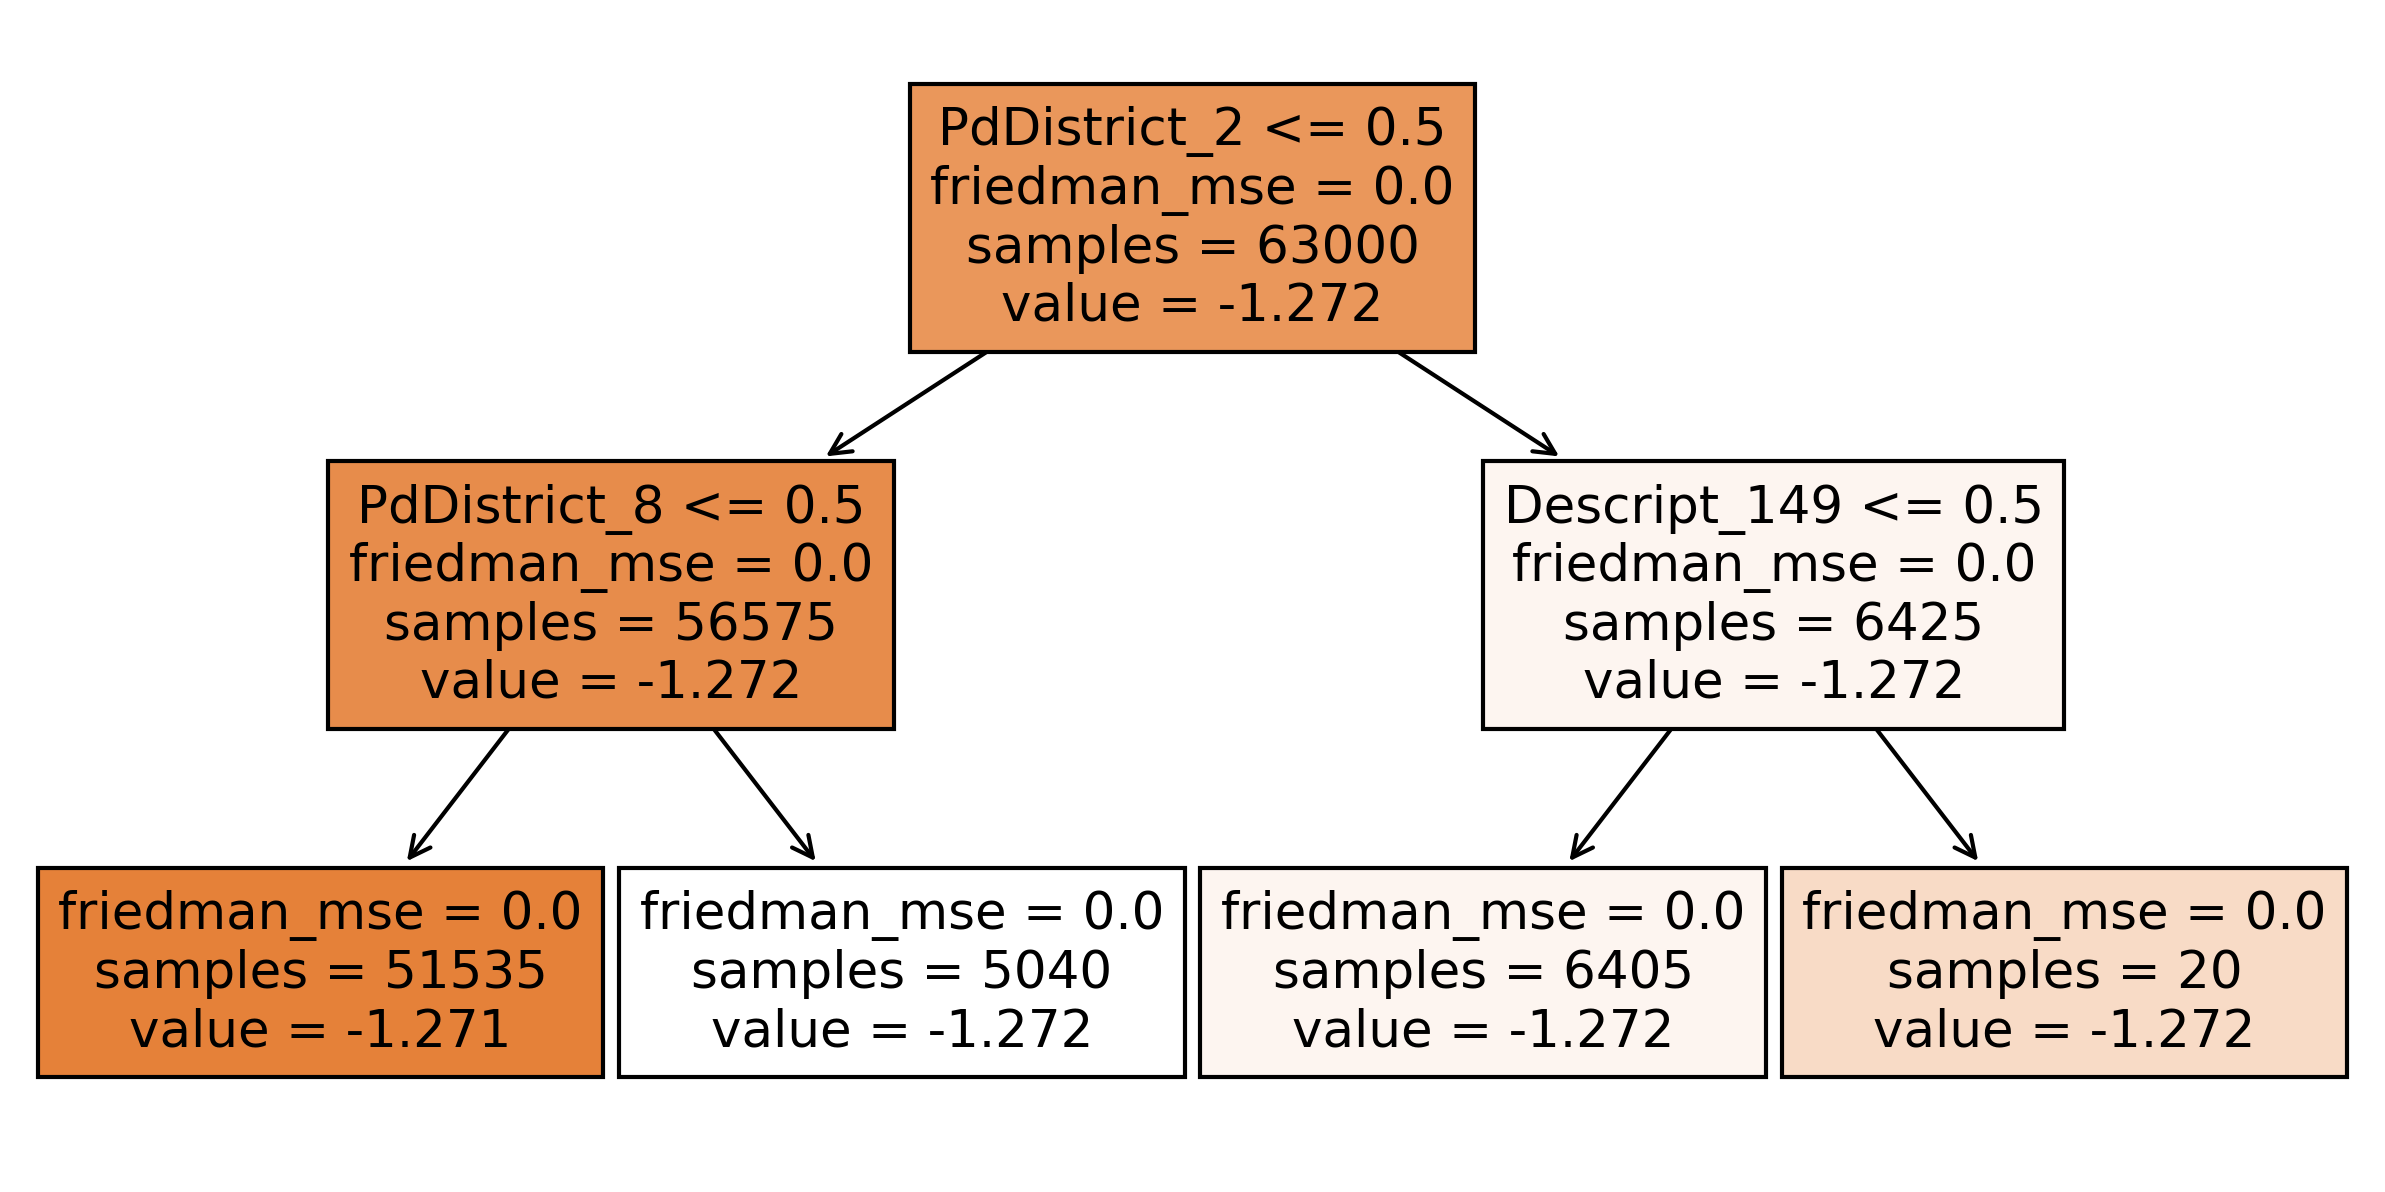

In [72]:
import matplotlib.pyplot as plt
from sklearn import tree
fig,ax= plt.subplots(nrows=1,ncols=1,figsize =(10,5),dpi=300)
tree.plot_tree(dtr,feature_names = X_train.columns, filled = True)
plt.show()

In [73]:
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(df.drop(columns='tan',axis=1)):
    X_train, X_test = df.drop(columns='tan',axis=1).iloc[train_index], df.drop(columns='tan',axis=1).iloc[test_index]
    y_train, y_test = df['tan'].iloc[train_index], df['tan'].iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error'],'max_depth': [2,4,6,8,10,12]}
    dtr = tree.DecisionTreeRegressor()

    dtr_cv=GridSearchCV(dtr,grid, cv=5)
    dtr_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",dtr_cv.best_params_)
    dtr = tree.DecisionTreeRegressor(criterion=dtr_cv.best_params_['criterion'], max_depth=dtr_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = dtr.score(X_test, y_test)
    print(s)
    scores.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 10}
0.8881762161662689
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 10}
0.006780258882533863
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 2}
0.5209575824652362
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 2}
0.5589685138049119
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 2}
0.001893933051608454


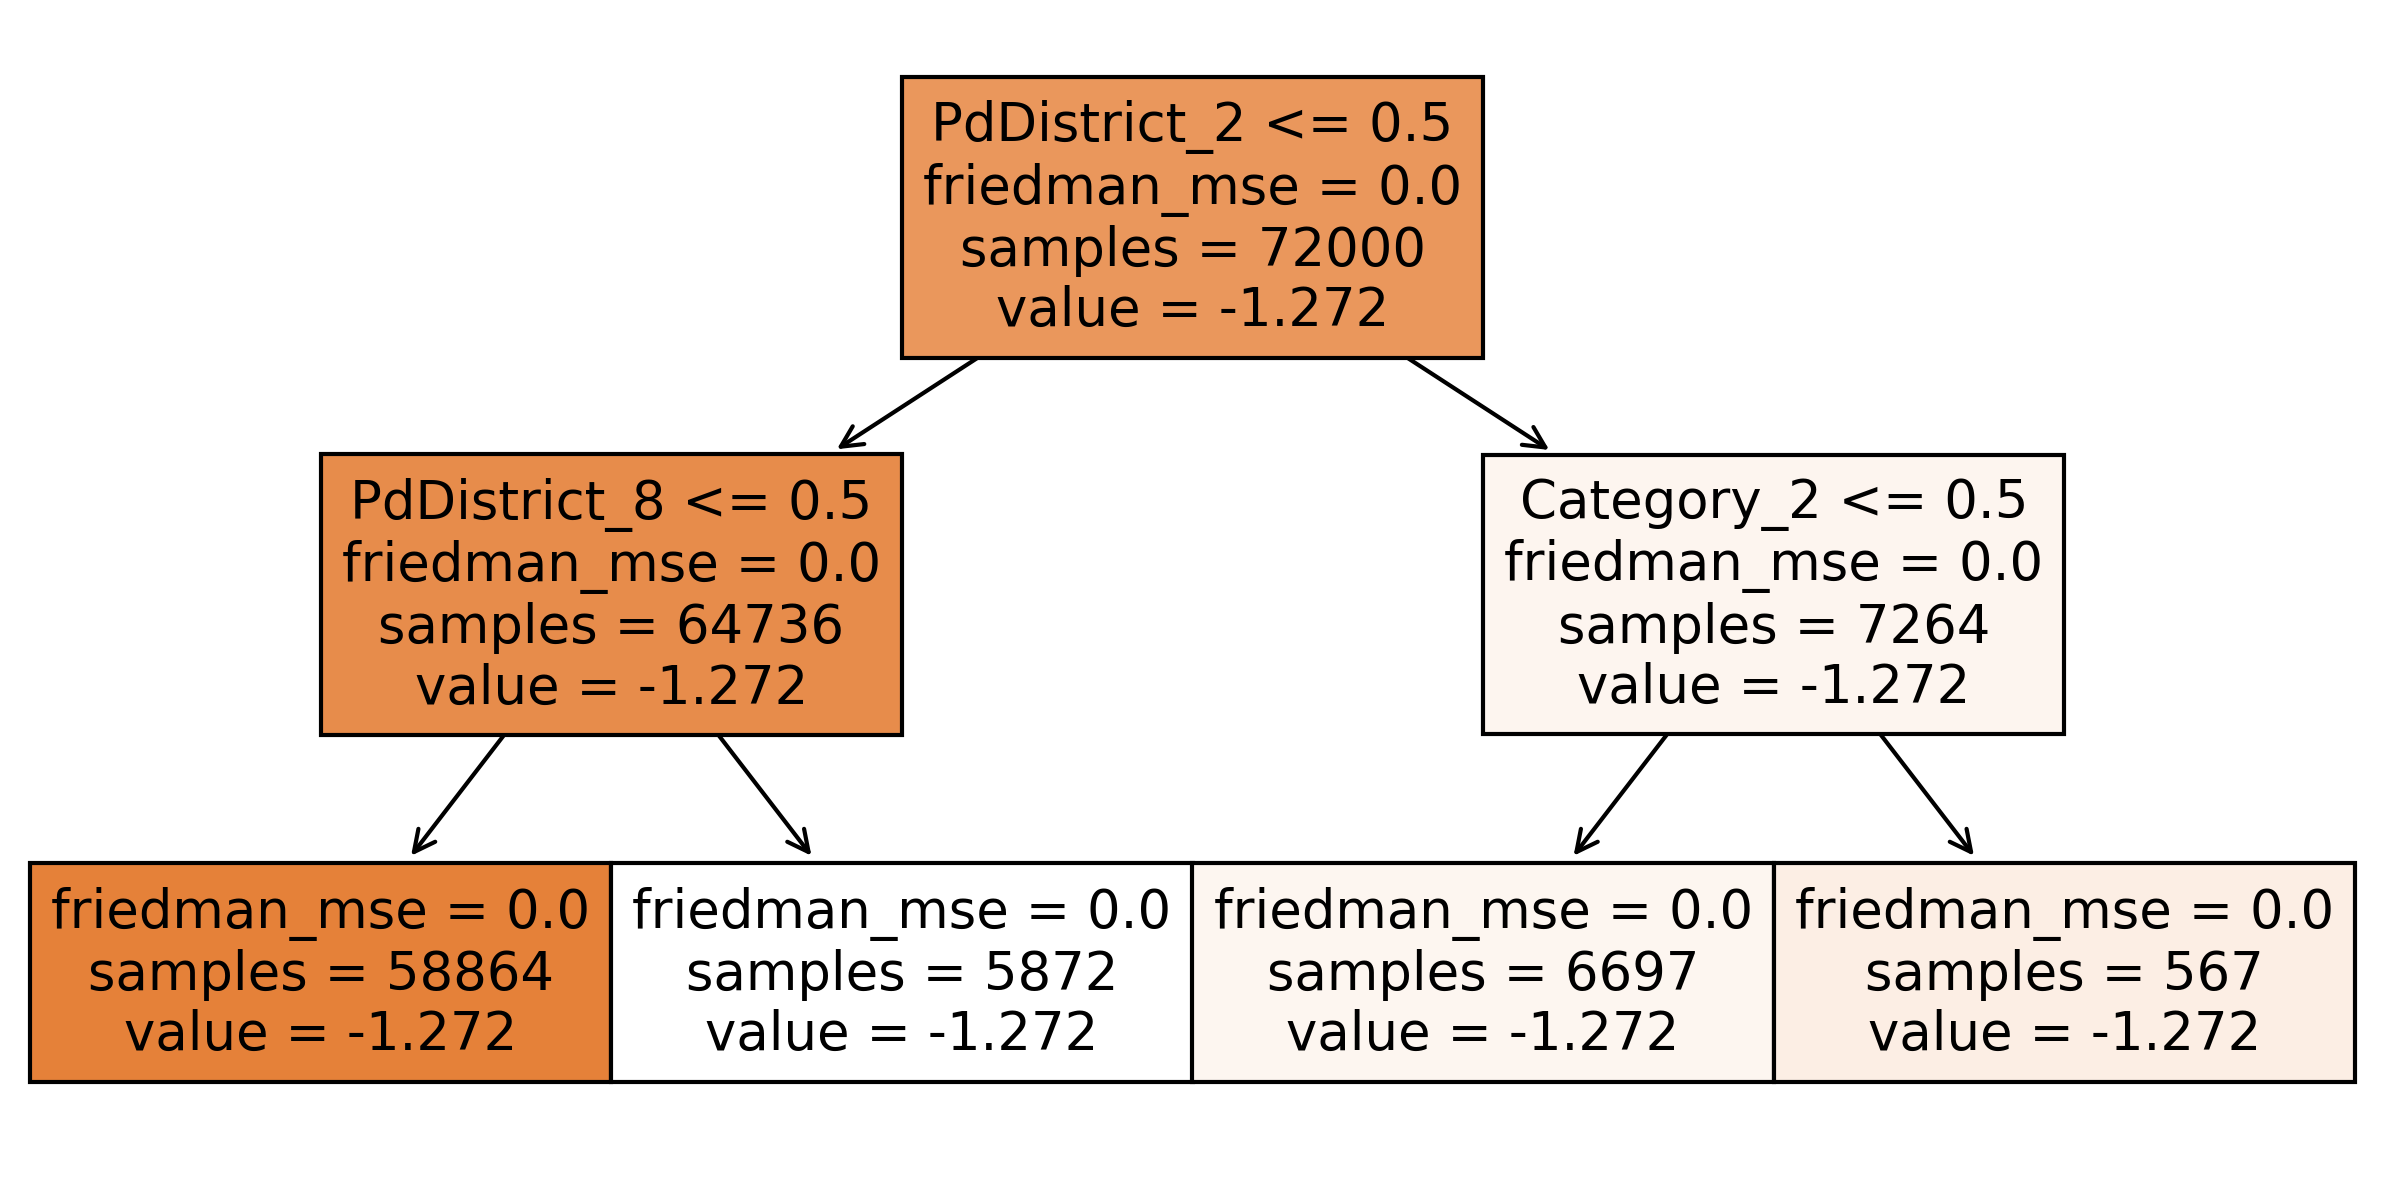

In [74]:
import matplotlib.pyplot as plt
from sklearn import tree
fig,ax= plt.subplots(nrows=1,ncols=1,figsize =(10,5),dpi=300)
tree.plot_tree(dtr,feature_names = X_train.columns, filled = True)
plt.show()

In [77]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
scores1 = []
for train_index, test_index in skf.split(df.drop(columns='tan',axis=1),df['Category_0']):
    X_train, X_test = df.drop(columns='tan',axis=1).iloc[train_index], df.drop(columns='tan',axis=1).iloc[test_index]
    y_train, y_test = df['tan'].iloc[train_index], df['tan'].iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    
    grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error'],'max_depth': [2,4,6,8,10,12]}
    dtr = tree.DecisionTreeRegressor()

    dtr_cv=GridSearchCV(dtr,grid)
    dtr_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",dtr_cv.best_params_)
    dtr = tree.DecisionTreeRegressor(criterion=dtr_cv.best_params_['criterion'], max_depth=dtr_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = dtr.score(X_test, y_test)
    print(s)
    scores1.append(s)
    

tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 10}
-32.49771455153131
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 10}
0.00747919335271896
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 10}
0.8732323333107735
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 10}
0.8581893014341021
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 8}
0.003210196455672887


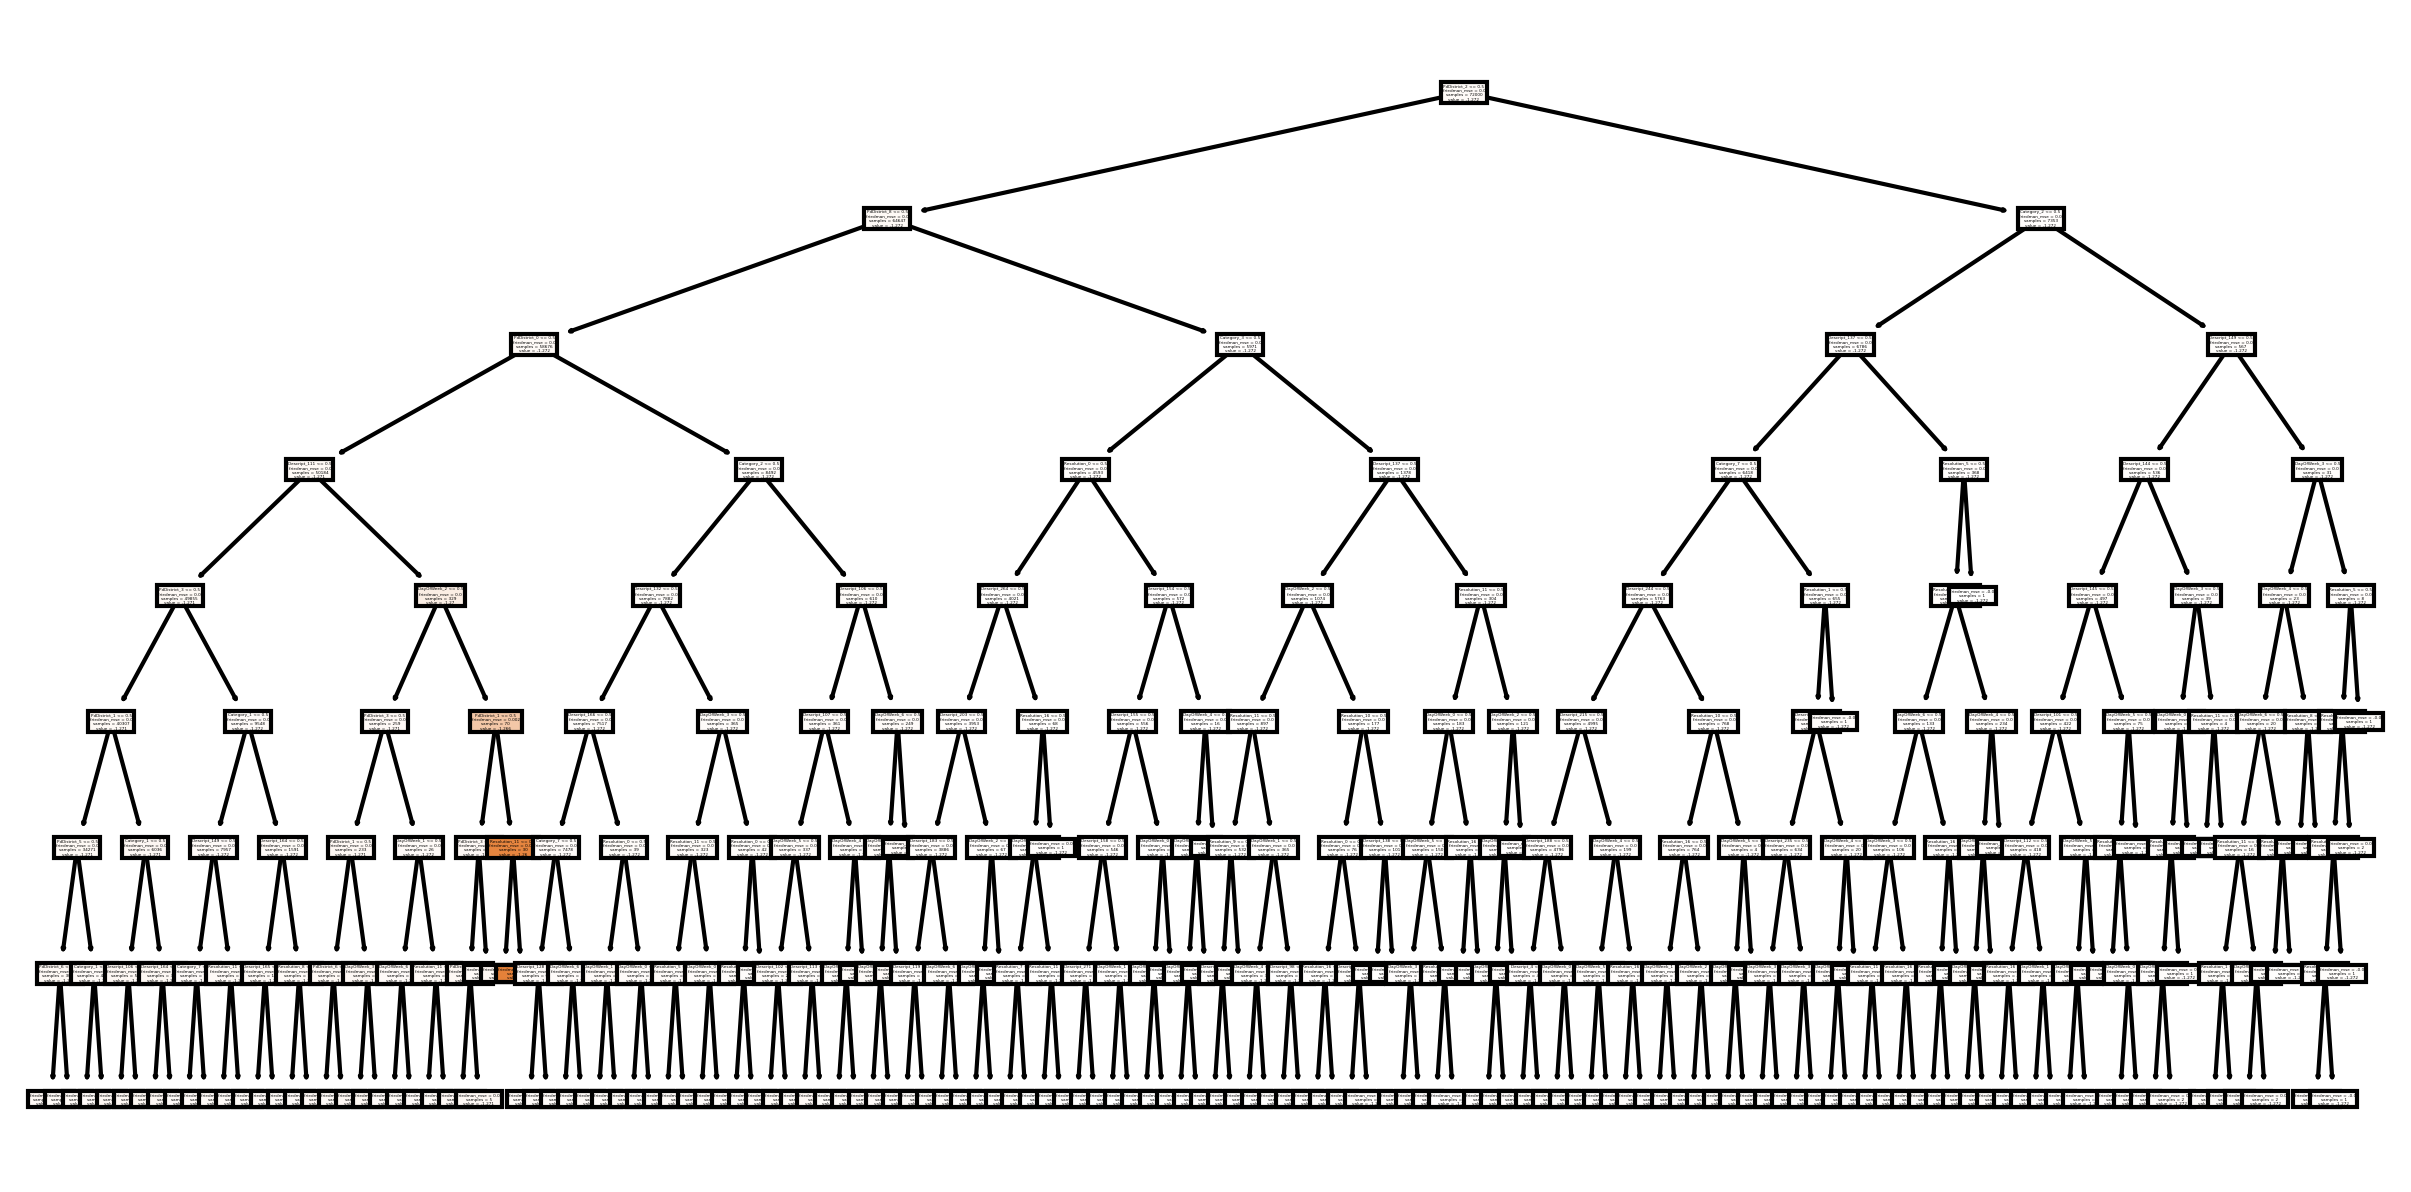

In [78]:
import matplotlib.pyplot as plt
from sklearn import tree
fig,ax= plt.subplots(nrows=1,ncols=1,figsize =(10,5),dpi=300)
tree.plot_tree(dtr,feature_names = X_train.columns, filled = True)
plt.show()